In [145]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [146]:
import pandas as pd
import numpy as np

In [147]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.callbacks import EarlyStopping
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils

In [148]:
df = pd.read_csv('/kaggle/input/devanagari-character-set/data.csv')
df.head()

,pixel_0000,pixel_0001,pixel_0002,pixel_0003,pixel_0004,pixel_0005,pixel_0006,pixel_0007,pixel_0008,pixel_0009,...,pixel_1015,pixel_1016,pixel_1017,pixel_1018,pixel_1019,pixel_1020,pixel_1021,pixel_1022,pixel_1023,character
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,character_01_ka
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,character_01_ka
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,character_01_ka
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,character_01_ka
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,character_01_ka


In [149]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [150]:
# output in binary format for NN
from sklearn.preprocessing import LabelBinarizer
binencoder = LabelBinarizer()
y = binencoder.fit_transform(y)

In [151]:
X_images = X.values.reshape(92000,32,32)
# X_images[0].imshow()

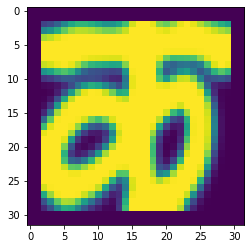

In [152]:
import matplotlib.pyplot as plt
plt.imshow(X_images[0])
plt.show()

In [153]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_images, y, test_size=0.20, random_state=92)

X_train = X_train/255
X_test = X_test/255

In [154]:
# changing from 3 to 4 dimensions of inputss
X_train = X_train.reshape(X_train.shape[0], 32, 32, 1).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 32, 32, 1).astype('float32')

In [155]:
# Building the Convolutional Model
conv_model = Sequential()

# Adding first CONV layer wit max-pooling
conv_model.add(
    Conv2D(32, (4, 4), 
           input_shape=(32, 32,1),
           activation='relu', 
           name="firstConv"
    )
)

conv_model.add(
    MaxPooling2D(pool_size=(2, 2), 
                 name="FirstPool"
                )
)

In [156]:
# Adding second set of Conv and max-pool layers

conv_model.add(
    Conv2D(64, (3, 3), 
           activation='relu', 
           name="SecondConv"
          )
)

conv_model.add(
    MaxPooling2D(
        pool_size=(2, 2),
        name="SecondPool")
)

In [157]:
conv_model.add(Dropout(0.2)) # Prevents Overfitting in Conv Nete

In [158]:
# Building Dense neural net on outputs of the Conv Net

# Input Layer : Flattening the Outputs of the Conv Nets
conv_model.add(Flatten())

# Two Dense Layers 128 Neuraons and 50 Neurons
conv_model.add(
    Dense(128,
          activation='relu',
          name="dense_1"
         )
)
conv_model.add(
    Dense(50, 
          activation='relu', 
          name="dense_2"
         )
)

# Output Layer with 46 Unique Outputs
conv_model.add(
    Dense(46, 
          activation='softmax', 
          name="modeloutput"
         )
)

conv_model.compile(
    loss='categorical_crossentropy', 
    optimizer='adam',
    metrics=['accuracy']
)

In [159]:
conv_model.summary()

Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
firstConv (Conv2D)           (None, 29, 29, 32)        544       
_________________________________________________________________
FirstPool (MaxPooling2D)     (None, 14, 14, 32)        0         
_________________________________________________________________
SecondConv (Conv2D)          (None, 12, 12, 64)        18496     
_________________________________________________________________
SecondPool (MaxPooling2D)    (None, 6, 6, 64)          0         
_________________________________________________________________
dropout_10 (Dropout)         (None, 6, 6, 64)          0         
_________________________________________________________________
flatten_16 (Flatten)         (None, 2304)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)             

In [160]:
# Training the Model on TRaining Dataset
result = conv_model.fit(X_train, y_train, validation_split=0.20, epochs=10, batch_size=92,verbose=2)

Train on 58880 samples, validate on 14720 samples
Epoch 1/10
 - 37s - loss: 1.0177 - accuracy: 0.7208 - val_loss: 0.3405 - val_accuracy: 0.9010
Epoch 2/10
 - 36s - loss: 0.2779 - accuracy: 0.9165 - val_loss: 0.2022 - val_accuracy: 0.9397
Epoch 3/10
 - 36s - loss: 0.1771 - accuracy: 0.9452 - val_loss: 0.1631 - val_accuracy: 0.9521
Epoch 4/10
 - 36s - loss: 0.1273 - accuracy: 0.9600 - val_loss: 0.1546 - val_accuracy: 0.9542
Epoch 5/10
 - 37s - loss: 0.0975 - accuracy: 0.9692 - val_loss: 0.1290 - val_accuracy: 0.9634
Epoch 6/10
 - 37s - loss: 0.0787 - accuracy: 0.9751 - val_loss: 0.1255 - val_accuracy: 0.9637
Epoch 7/10
 - 36s - loss: 0.0676 - accuracy: 0.9781 - val_loss: 0.1206 - val_accuracy: 0.9668
Epoch 8/10
 - 36s - loss: 0.0567 - accuracy: 0.9806 - val_loss: 0.1007 - val_accuracy: 0.9717
Epoch 9/10
 - 36s - loss: 0.0475 - accuracy: 0.9845 - val_loss: 0.1057 - val_accuracy: 0.9698
Epoch 10/10
 - 37s - loss: 0.0452 - accuracy: 0.9850 - val_loss: 0.1075 - val_accuracy: 0.9707


In [161]:
# TESt Data Testign Accuracy
scores = conv_model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 97.11%


In [163]:
conv_model.save('/kaggle/working/conv_model.hdf5')

In [177]:
X_images[1000].shape

(32, 32)

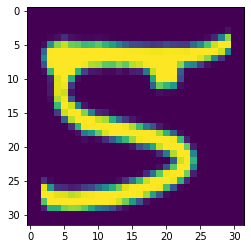

'character_13_daa'

In [187]:
num = 25220
plt.imshow(X_images[num])
plt.show()


imgTrans = X_images[num].reshape(1,32,32,1)
imgTrans.shape

predictions = conv_model.predict(imgTrans)
binencoder.classes_[np.argmax(predictions)]